**Crime Data in Brazil**

All crime data for 10 years of police work in the biggest city of South America

https://www.kaggle.com/datasets/inquisitivecrow/crime-data-in-brazil/data



---



Será utilizado nessa análise os dados do ano de 2016 juntamente com técnicas de aprendizado de máquina não-supervisionado para identificar padrões nos dados.

# Pré processamento

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BO_2016.csv')
df.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,RUBRICA,DESDOBRAMENTO,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,Unnamed: 21
0,3784,2016,10101,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,DECAP,DEL.SEC.1º CENTRO,78º D.P. JARDINS,2016.0,...,Furto (art. 155),NaN,TRANSEUNTE,-23.564984,-46.652035,S.PAULO,AVENIDA PAULISTA,1000.0,C,NaN
1,3426,2016,10102,DECAP,DEL.SEC.1º CENTRO,02º D.P. BOM RETIRO,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,2016.0,...,Roubo (art. 157),NaN,TRANSEUNTE,-23.542476,-46.641928,S.PAULO,PRAÇA DA REPUBLICA,0.0,C,NaN
2,6359,2016,10102,DECAP,DEL.SEC.1º CENTRO,02º D.P. BOM RETIRO,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,2016.0,...,Drogas sem autorização ou em desacordo (Art.33...,NaN,NaN,-23.542183,-46.640599,S.PAULO,RUA CONSELHEIRO NEBIAS,0.0,C,NaN
3,1267,2016,10103,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,DECAP,DEL.SEC.8º SAO MATEUS,49º D.P. SAO MATEUS,2016.0,...,Roubo (art. 157),NaN,CARGA,-23.609275,-46.455087,S.PAULO,RUA MADUREIRA CALHEIROS,15.0,C,NaN
4,4804,2016,10106,DECAP,DEL.SEC.1º CENTRO,06º D.P. CAMBUCI,DECAP,DEL.SEC.1º CENTRO,06º D.P. CAMBUCI,2016.0,...,Lesão corporal (art. 129),NaN,NaN,-23.573928,-46.620693,S.PAULO,RUA ROBERTSON,625.0,C,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25501 entries, 0 to 25500
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NUM_BO                  25501 non-null  int64  
 1   ANO_BO                  25501 non-null  int64  
 2   ID_DELEGACIA            25501 non-null  int64  
 3   NOME_DEPARTAMENTO       25501 non-null  object 
 4   NOME_SECCIONAL          25501 non-null  object 
 5   DELEGACIA               25501 non-null  object 
 6   NOME_DEPARTAMENTO_CIRC  25501 non-null  object 
 7   NOME_SECCIONAL_CIRC     25501 non-null  object 
 8   NOME_DELEGACIA_CIRC     25501 non-null  object 
 9   ANO                     25500 non-null  float64
 10  MES                     25500 non-null  float64
 11  FLAG_STATUS             25500 non-null  object 
 12  RUBRICA                 25500 non-null  object 
 13  DESDOBRAMENTO           1002 non-null   object 
 14  CONDUTA                 21687 non-null

**Pré-processamento**



1.   Remover dados nulos, inconsistentes e mal formatados e atributos descenessários;
2.   Normalizar os dados.



---



In [3]:
df.isna().sum()

,0
NUM_BO,0
ANO_BO,0
ID_DELEGACIA,0
NOME_DEPARTAMENTO,0
NOME_SECCIONAL,0
DELEGACIA,0
NOME_DEPARTAMENTO_CIRC,0
NOME_SECCIONAL_CIRC,0
NOME_DELEGACIA_CIRC,0
ANO,1


In [3]:
df.drop(columns=['NOME_SECCIONAL','NUMERO_LOGRADOURO','NOME_SECCIONAL_CIRC','NOME_DELEGACIA_CIRC','DESDOBRAMENTO','CONDUTA','LATITUDE','LONGITUDE','Unnamed: 21','FLAG_STATUS','FLAG_STATUS.1','ANO','ANO_BO','NOME_DEPARTAMENTO','NOME_DEPARTAMENTO_CIRC','CIDADE'],inplace=True)

In [4]:
df.dropna(subset=['LOGRADOURO'],inplace=True)
df['LOGRADOURO'] = df['LOGRADOURO'].str.strip()
df['DELEGACIA'] = df['DELEGACIA'].str.strip()
df['RUBRICA'] = df['RUBRICA'].str.strip()
print(f'Duplicados: {df.duplicated().sum()}, {df.duplicated().sum()/df.shape[0]}% do dataset')
df.drop_duplicates(inplace=True)

Duplicados: 0, 0.0% do dataset


In [5]:
df_object = df.select_dtypes(include='object')
df_object.head()

,DELEGACIA,RUBRICA,LOGRADOURO
0,01º D.P. SE,Furto (art. 155),AVENIDA PAULISTA
1,02º D.P. BOM RETIRO,Roubo (art. 157),PRAÇA DA REPUBLICA
2,02º D.P. BOM RETIRO,Drogas sem autorização ou em desacordo (Art.33...,RUA CONSELHEIRO NEBIAS
3,03º D.P. CAMPOS ELISEOS,Roubo (art. 157),RUA MADUREIRA CALHEIROS
4,06º D.P. CAMBUCI,Lesão corporal (art. 129),RUA ROBERTSON


In [7]:
display(df_object.describe())
display(df_object['RUBRICA'].value_counts()[:10])
display(df_object['DELEGACIA'].value_counts()[:10])
display(df_object['LOGRADOURO'].value_counts()[:10])

,DELEGACIA,RUBRICA,LOGRADOURO
count,25496,25496,25496
unique,360,31,13036
top,DELEGACIA ELETRONICA,Roubo (art. 157),AVENIDA PAULISTA
freq,8673,10401,153


,count
RUBRICA,
Roubo (art. 157),10401
Furto (art. 155),9494
"Furto qualificado (art. 155, §4o.)",1598
Lesão corporal (art. 129),1423
Lesão corporal culposa na direção de veículo automotor (Art. 303),998
Lesão corporal (art 129 § 9º),459
"Drogas sem autorização ou em desacordo (Art.33, caput)",346
"A.I.-Drogas sem autorização ou em desacordo (Art.33, caput)",148
A.I.-Roubo (art. 157),131


,count
DELEGACIA,
DELEGACIA ELETRONICA,8673
POLICIA MILITAR,278
13º D.P. CASA VERDE,229
16º D.P. VILA CLEMENTINO,222
11º D.P. SANTO AMARO,219
49º D.P. SAO MATEUS,217
47º D.P. CAPAO REDONDO,216
73º D.P. JACANA,213
01º D.P. CARAPICUIBA,202


,count
LOGRADOURO,
AVENIDA PAULISTA,153
RUA AUGUSTA,99
RUA VINTE E CINCO DE MARCO,78
AVENIDA CRUZEIRO DO SUL,75
AVENIDA SAPOPEMBA,75
AVENIDA BRIGADEIRO FARIA LIMA,65
AVENIDA ARICANDUVA,59
AVENIDA MARECHAL TITO,57
RUA DA CONSOLACAO,57


Problematica: Utilizando 3 features categóricas aplicando one-hot gerou mais de 8 mil dimensões. Dessa forma temos um problema de muitas dimensões, mesmo aplicando redução de dimensionalidade estava gerando clusters do pouco contexto e de dificil interpretação. Portanto, foi realizdo um processo de feature enginering para gerar novos atributos, com o objetivo de obter atributos melhores.

# Feature Enginering
---

Frequência de crimes, delegacias e logradouros.

In [6]:
df_object['freq_crime'] = df_object['RUBRICA'].map(df['RUBRICA'].value_counts())
df_object['freq_delegacia'] = df_object['DELEGACIA'].map(df['DELEGACIA'].value_counts())
df_object['freq_logradouro'] = df_object['LOGRADOURO'].map(df['LOGRADOURO'].value_counts())

Número de crimes por delegacia e logradouro.

In [7]:
df_object['crimes_por_delegacia'] = df_object.groupby('DELEGACIA')['RUBRICA'].transform('count')
df_object['crimes_por_logradouro'] = df_object.groupby('LOGRADOURO')['RUBRICA'].transform('count')

Quantitativo de crimes por delegacia e logradouro.

In [8]:
df_object['tipos_crime_delegacia'] = df_object.groupby('DELEGACIA')['RUBRICA'].transform('nunique')
df_object['tipos_crime_logradouro'] = df_object.groupby('LOGRADOURO')['RUBRICA'].transform('nunique')

Taxa de crimes na delegacia (quantidade de um determinado crime na delegacia / total de crimes na delegacia)

In [9]:
total_delegacia = df_object.groupby('DELEGACIA')['RUBRICA'].transform('count')
mesmo_crime = df_object.groupby(['DELEGACIA','RUBRICA'])['RUBRICA'].transform('count')

df_object['taxa_crime_na_delegacia'] = mesmo_crime / total_delegacia
df_object.head()

,DELEGACIA,RUBRICA,LOGRADOURO,freq_crime,freq_delegacia,freq_logradouro,crimes_por_delegacia,crimes_por_logradouro,tipos_crime_delegacia,tipos_crime_logradouro,taxa_crime_na_delegacia
0,01º D.P. SE,Furto (art. 155),AVENIDA PAULISTA,3761,36,57,36,57,8,5,0.333333
1,02º D.P. BOM RETIRO,Roubo (art. 157),PRAÇA DA REPUBLICA,4201,59,18,59,18,11,3,0.372881
2,02º D.P. BOM RETIRO,Drogas sem autorização ou em desacordo (Art.33...,RUA CONSELHEIRO NEBIAS,132,59,1,59,1,11,1,0.016949
3,03º D.P. CAMPOS ELISEOS,Roubo (art. 157),RUA MADUREIRA CALHEIROS,4201,39,1,39,1,4,1,0.435897
4,06º D.P. CAMBUCI,Lesão corporal (art. 129),RUA ROBERTSON,562,36,1,36,1,6,1,0.027778


In [10]:
from sklearn.preprocessing import StandardScaler

#cria o dataframe que será utilizado no modelo
df_int = df_object.select_dtypes(include='int64')
df_int['taxa_crime_na_delegacia'] = df_object['taxa_crime_na_delegacia']
df_int.head()

#normaliza
scaler = StandardScaler()
X_encoded = scaler.fit_transform(df_int)
df_scaled = pd.DataFrame(X_encoded, columns=scaler.feature_names_in_)
df_scaled.head()

,freq_crime,freq_delegacia,freq_logradouro,crimes_por_delegacia,crimes_por_logradouro,tipos_crime_delegacia,tipos_crime_logradouro,taxa_crime_na_delegacia
0,0.369316,-0.728443,7.369943,-0.728443,7.369943,0.809905,2.705800,-0.298563
1,0.663380,-0.714408,1.926053,-0.714408,1.926053,1.730217,1.022103,-0.101713
2,-2.056051,-0.714408,-0.446924,-0.714408,-0.446924,1.730217,-0.661594,-1.873360
3,0.663380,-0.726612,-0.446924,-0.726612,-0.446924,-0.417178,-0.661594,0.211949
4,-1.768669,-0.728443,-0.446924,-0.728443,-0.446924,0.196363,-0.661594,-1.819461


# **Hierarquical Clustering**

Plotando o dendrograma com uma amostra dos dados.


---



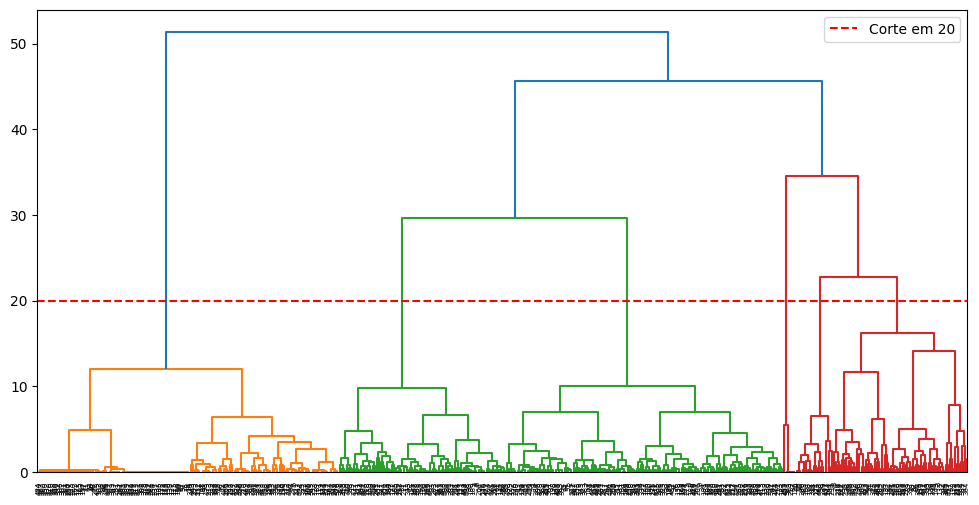

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage


idx = np.random.choice(X_encoded.shape[0], size=500, replace=False)
X_sample = X_encoded[idx]

linkage_matrix = linkage(X_sample, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.axhline(y=20, color='red', linestyle='--', label=f'Corte em {20}')
plt.legend()
plt.show()

# **KMeans**


---



Aplicando o método do cotovelo para identificar o melhor valor para **k**.

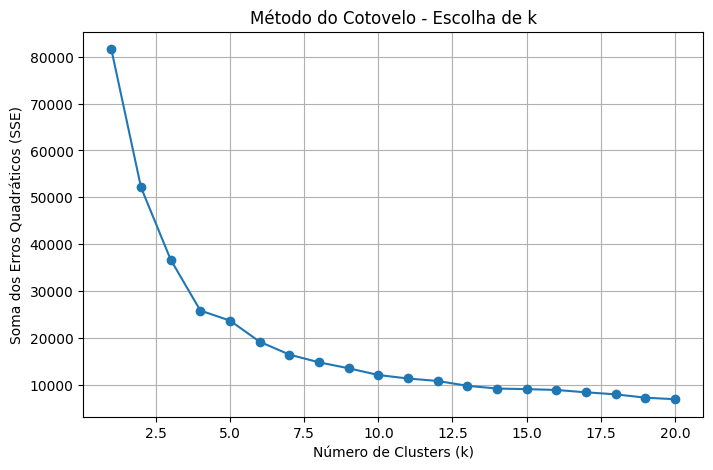

In [12]:
from sklearn.cluster import KMeans

sse = []
k_values = range(1, 21)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_encoded)
    sse.append(kmeans.inertia_)

# 4. Plotar o gráfico do cotovelo
plt.figure(figsize=(8,5))
plt.plot(k_values, sse, marker='o')
plt.title("Método do Cotovelo - Escolha de k")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Soma dos Erros Quadráticos (SSE)")
plt.grid(True)
plt.show()

KMeans com os melhores parâmetros.

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_int['Cluster'] = kmeans.fit_predict(X_encoded)
df_scaled['Cluster'] = df_int['Cluster']

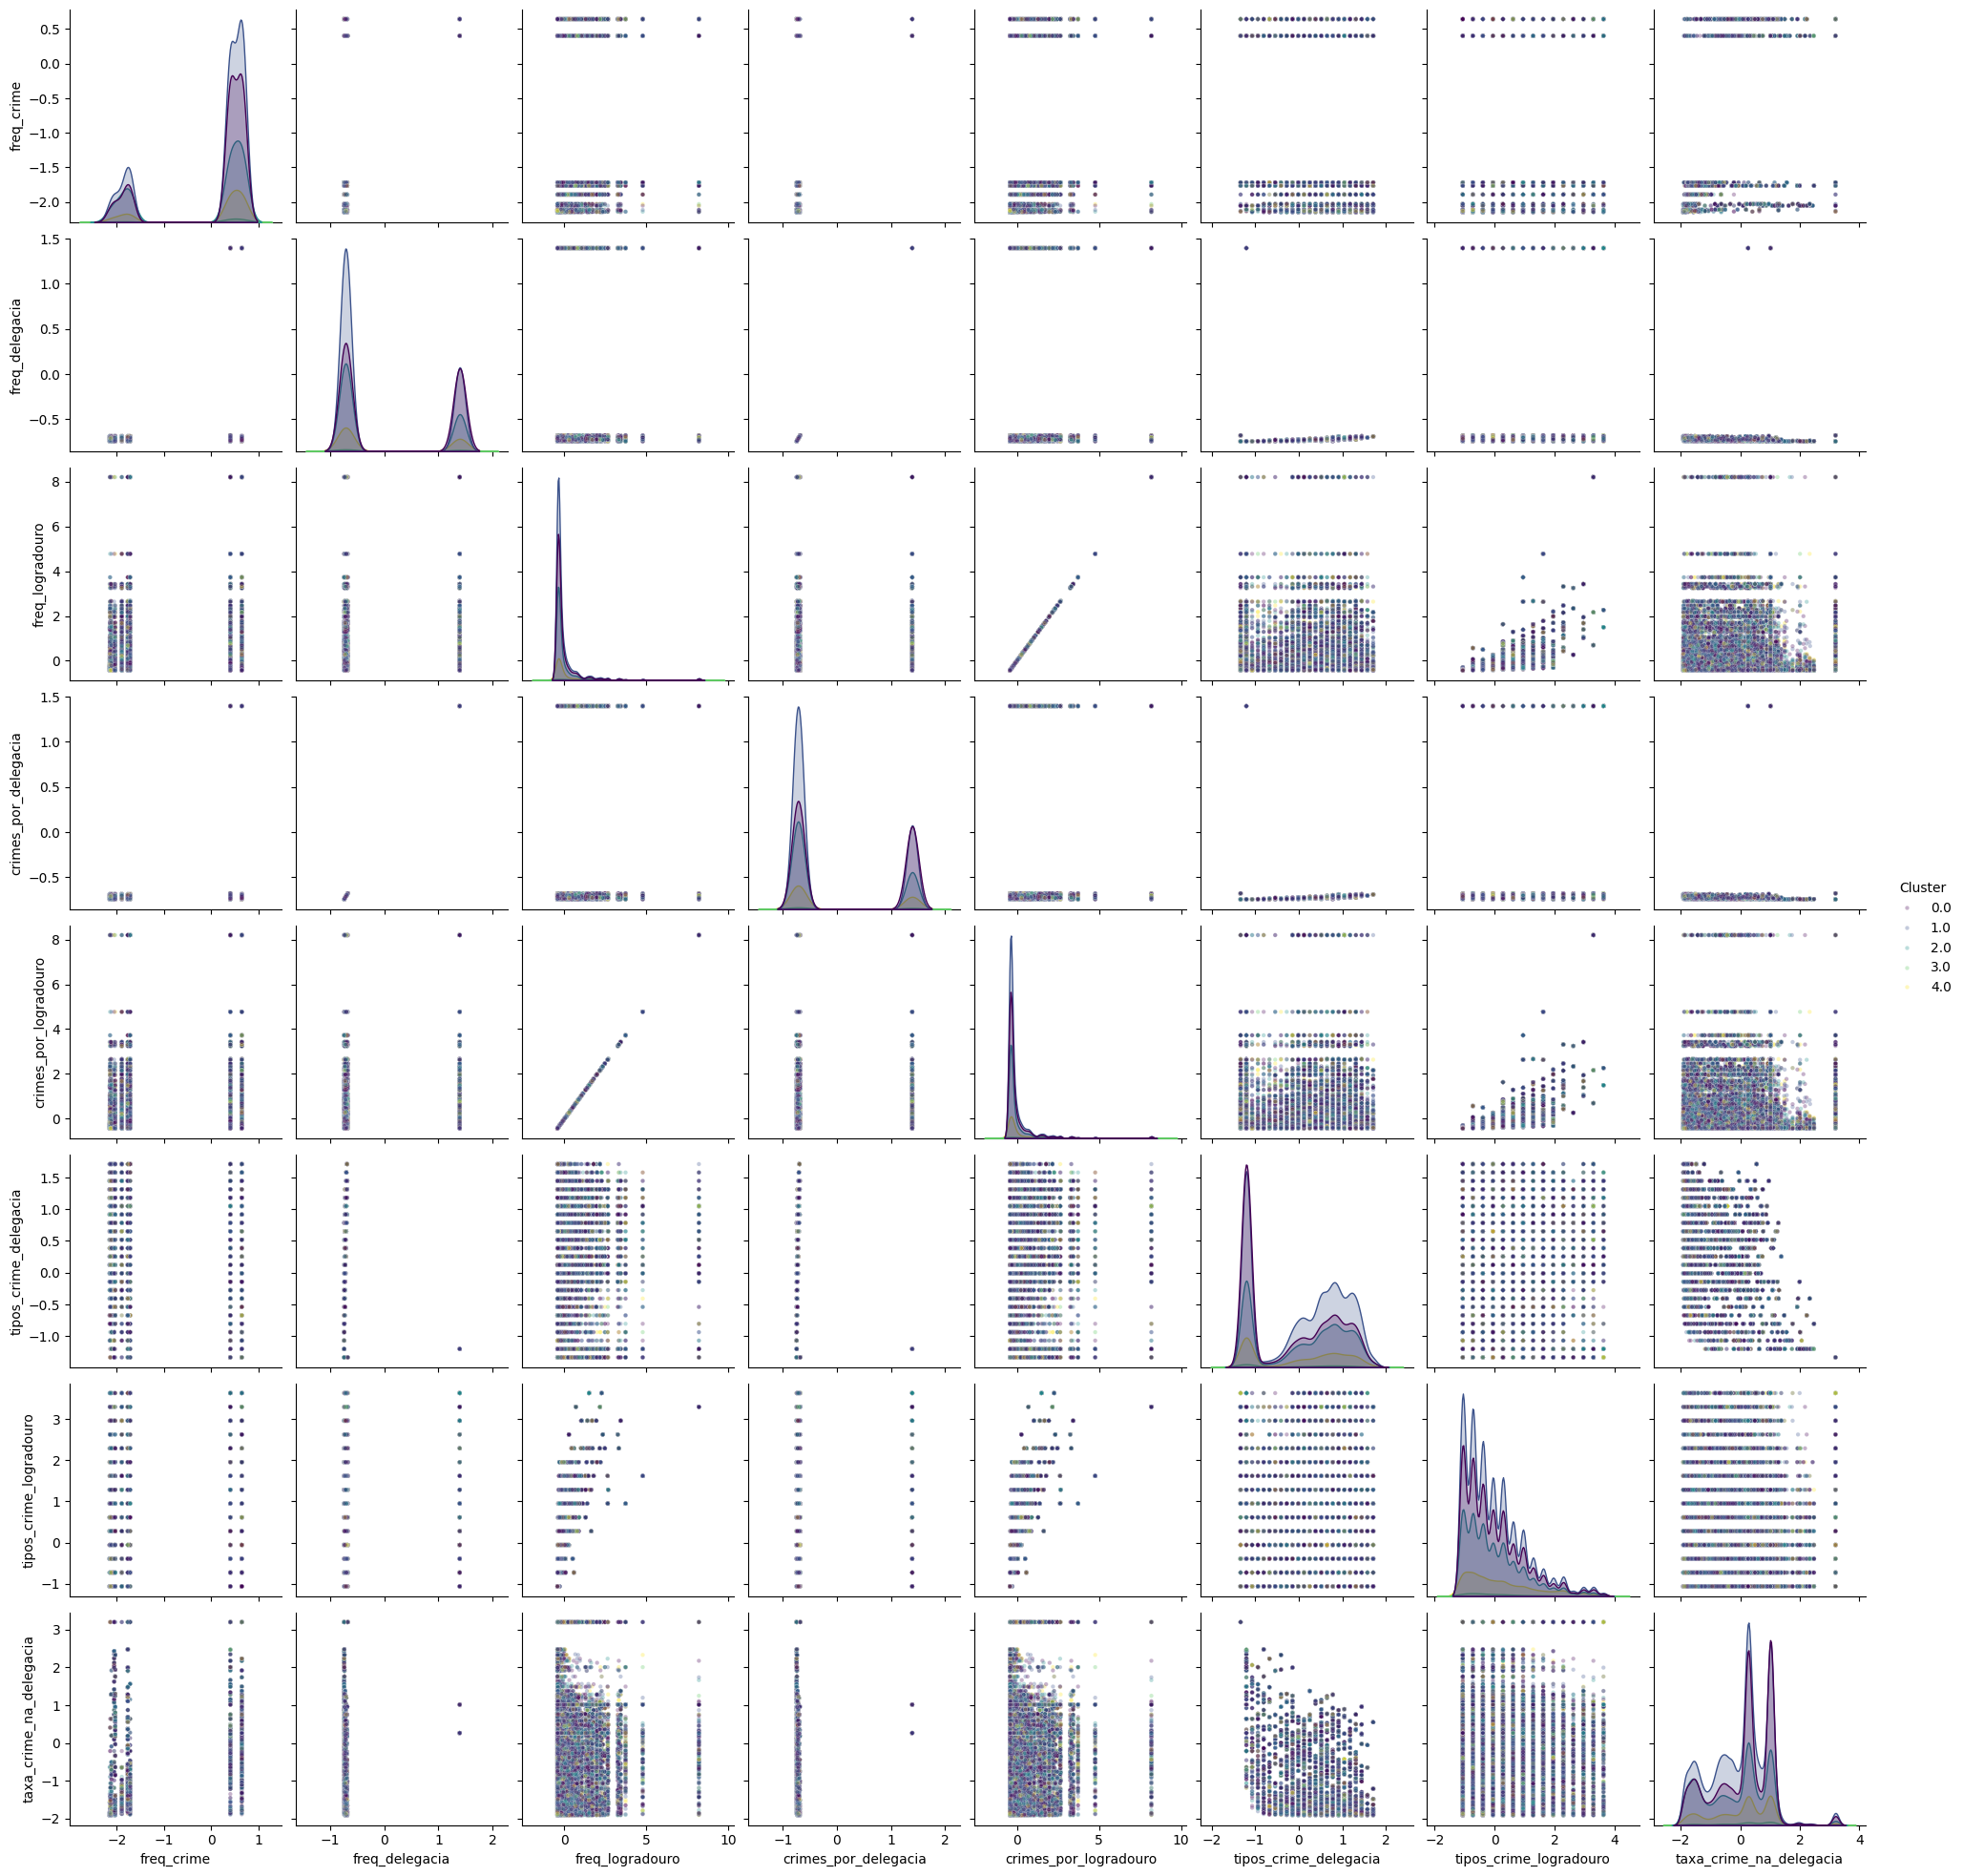

In [ ]:
sns.pairplot(df_scaled,kind='scatter', hue='Cluster', palette='hls',plot_kws={'s':10, 'alpha':0.3},corner=True)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit_transform(X_encoded)

df_plot = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'])
df_plot['Cluster'] = df_int['Cluster']

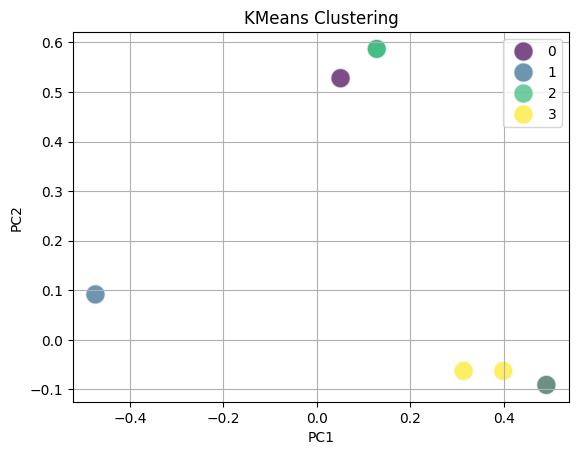

In [ ]:
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='viridis',s=200,alpha=0.7)
plt.title("KMeans Clustering")
plt.legend()
plt.grid(True)

In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_encoded)

df_tsne = pd.DataFrame({
    'x': X_tsne[:, 0],
    'y': X_tsne[:, 1]
})

<Axes: xlabel='x', ylabel='y'>

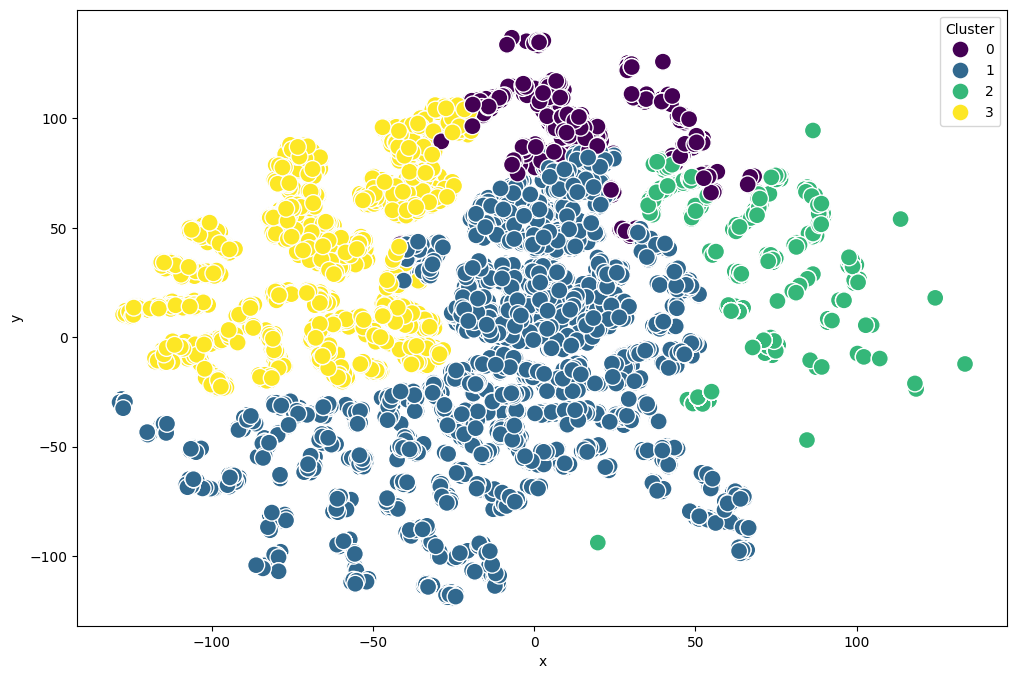

In [36]:
df_tsne['Cluster'] = df_int['Cluster']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_tsne, x='x', y='y',hue='Cluster',palette='viridis', s=150)

# Inserindo os clusteres no dataframe original para analisar os dados clusterizados.


---



In [ ]:
df_object['Cluster'] = df_int['Cluster']
descriptions = []

for cluster_id, group in df_object.groupby('Cluster'):
  rubrica_top = group['RUBRICA'].value_counts().idxmax()
  delegacia_top = group['DELEGACIA'].value_counts().head(3).index.tolist()
  logradouro_top = group['LOGRADOURO'].value_counts().head(3).index.tolist()
  total = len(group)
  description = f"""
  Cluster {cluster_id}:
  - Total de registros: {total}
  - Crime predominante: {rubrica_top}
  - Delegacias mais frequentes: {', '.join(delegacia_top)}
  - Locais mais citados: {', '.join(logradouro_top)}
  - Interpretação: Este cluster concentra ocorrências do tipo {rubrica_top.lower()},
    especialmente registradas nas delegacias {', '.join(delegacia_top)},
    com destaque para logradouros como {logradouro_top[0]} e {logradouro_top[1]}.
  """
  descriptions.append(description)

print("\n".join(descriptions))


  Cluster 0:
  - Total de registros: 52702
  - Crime predominante: Furto (art. 155)
  - Delegacias mais frequentes: DELEGACIA ELETRONICA
  - Locais mais citados: AVENIDA REBOUCAS, AVENIDA OLAVO FONTOURA, PRAÇA ROBERTO GOMES PEDROSA
  - Interpretação: Este cluster concentra ocorrências do tipo furto (art. 155),
    especialmente registradas nas delegacias DELEGACIA ELETRONICA,
    com destaque para logradouros como AVENIDA REBOUCAS e AVENIDA OLAVO FONTOURA.
  

  Cluster 1:
  - Total de registros: 69860
  - Crime predominante: Roubo (art. 157)
  - Delegacias mais frequentes: POLICIA MILITAR, 16º D.P. VILA CLEMENTINO, 49º D.P.  SAO MATEUS
  - Locais mais citados: AVENIDA DEPUTADO CANTIDIO SAMPAIO, RODOVIA PRESIDENTE DUTRA (BR 116), RUA SALVADOR GIANETTI
  - Interpretação: Este cluster concentra ocorrências do tipo roubo (art. 157),
    especialmente registradas nas delegacias POLICIA MILITAR, 16º D.P. VILA CLEMENTINO, 49º D.P.  SAO MATEUS,
    com destaque para logradouros como AVENIDA 

# **DBSCAN**


---



Vamos tentar identficiar anomalias nos dados

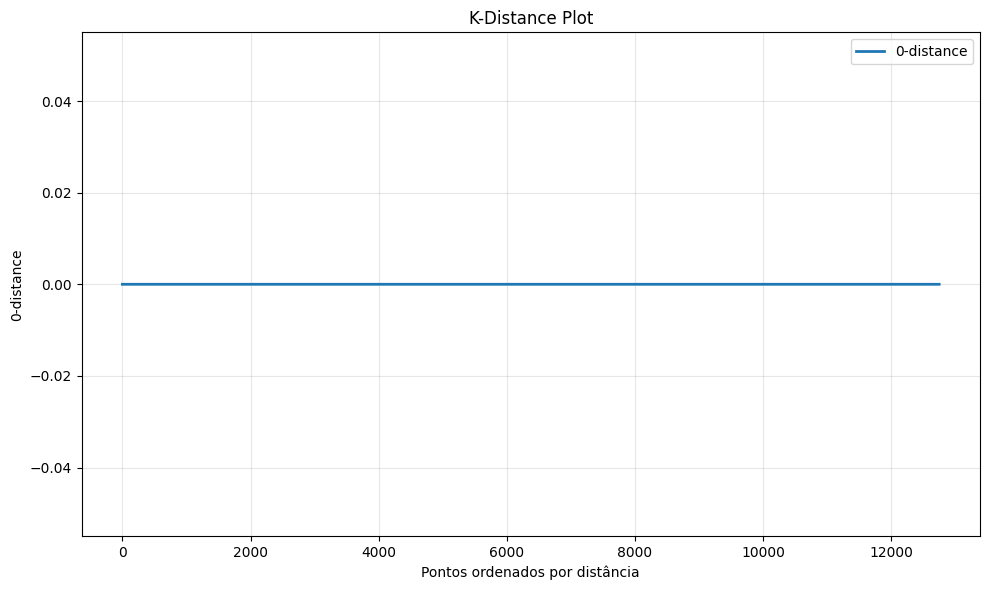

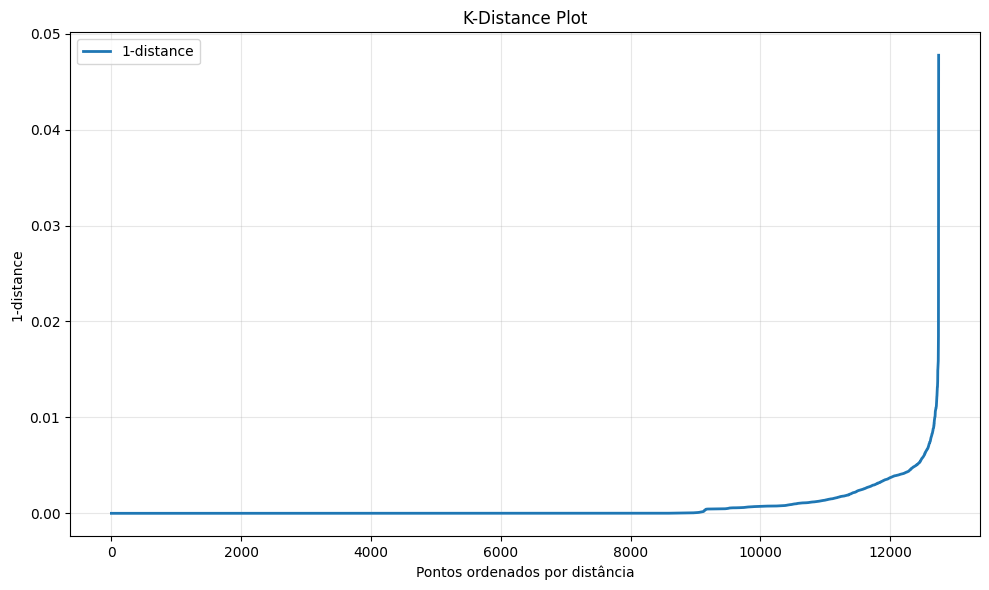

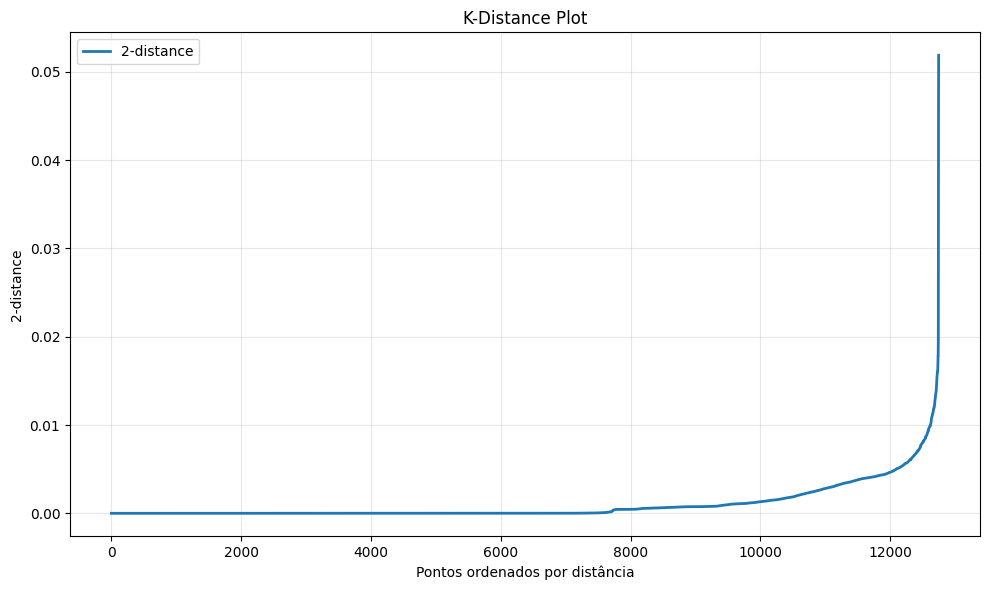

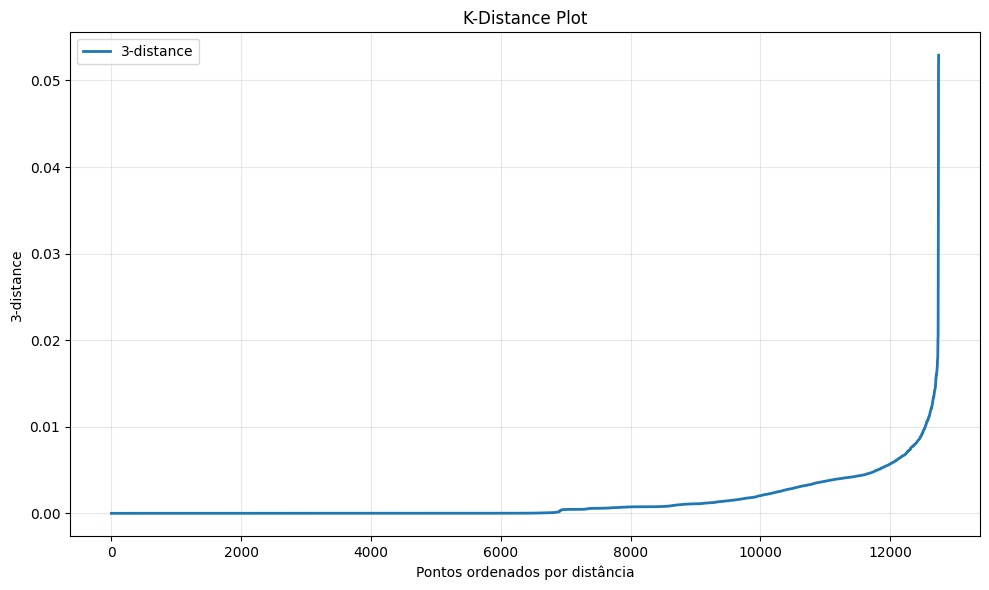

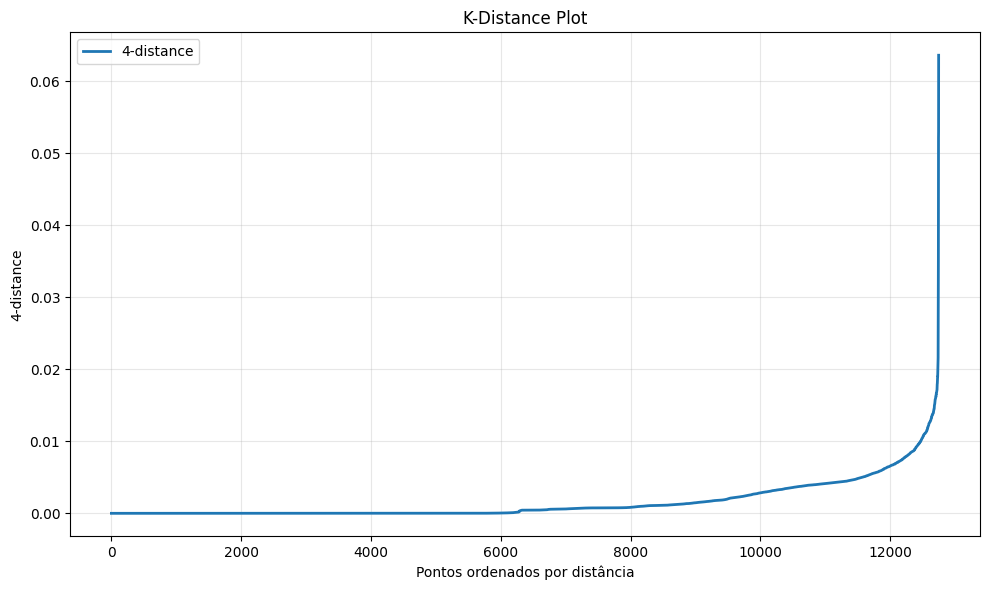

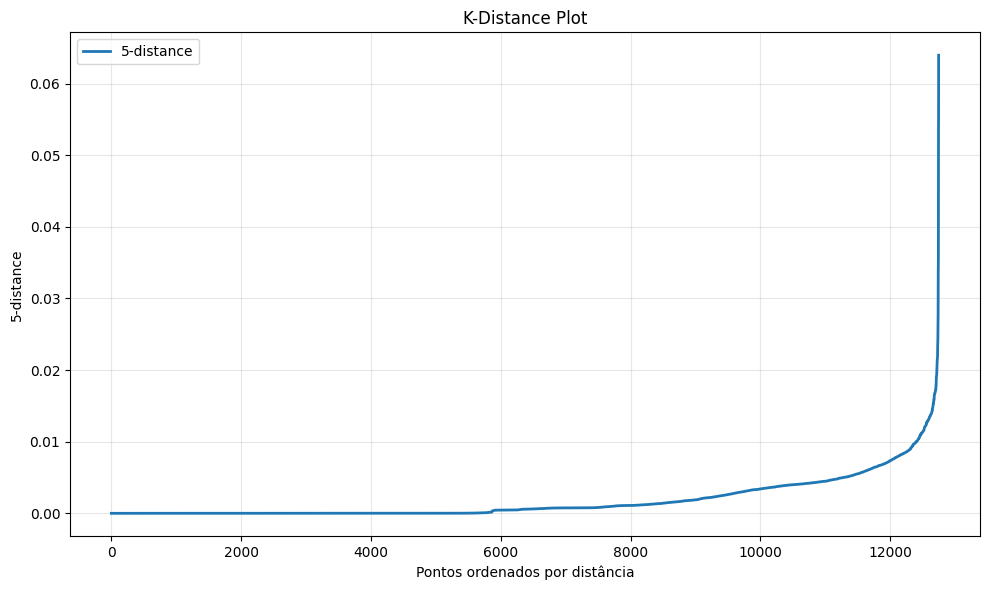

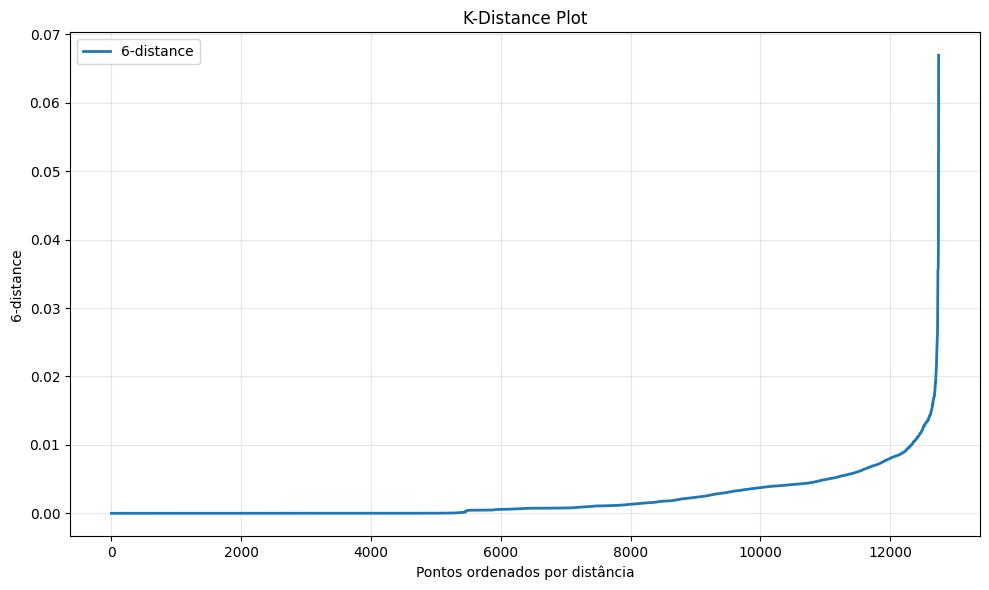

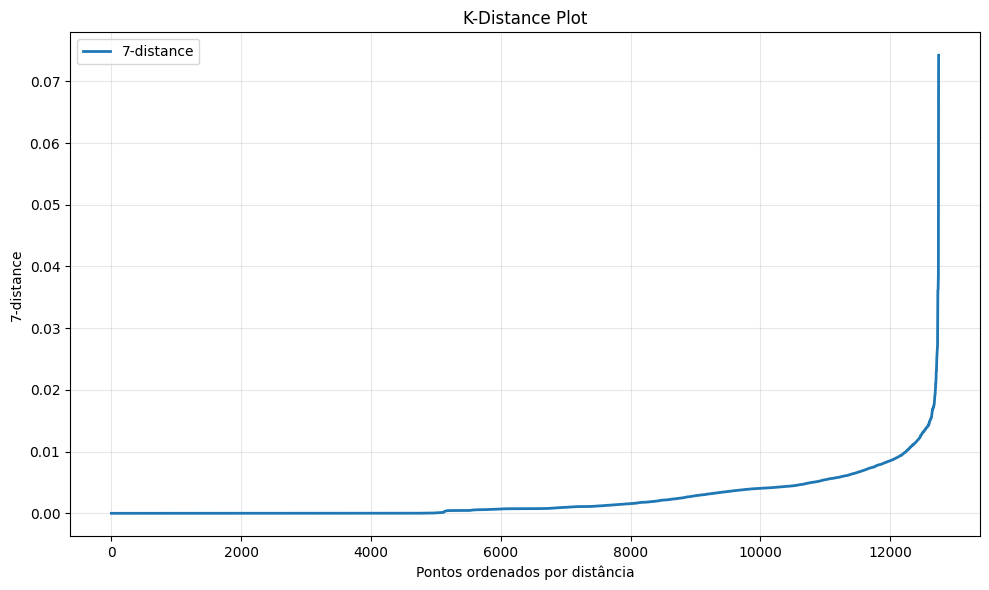

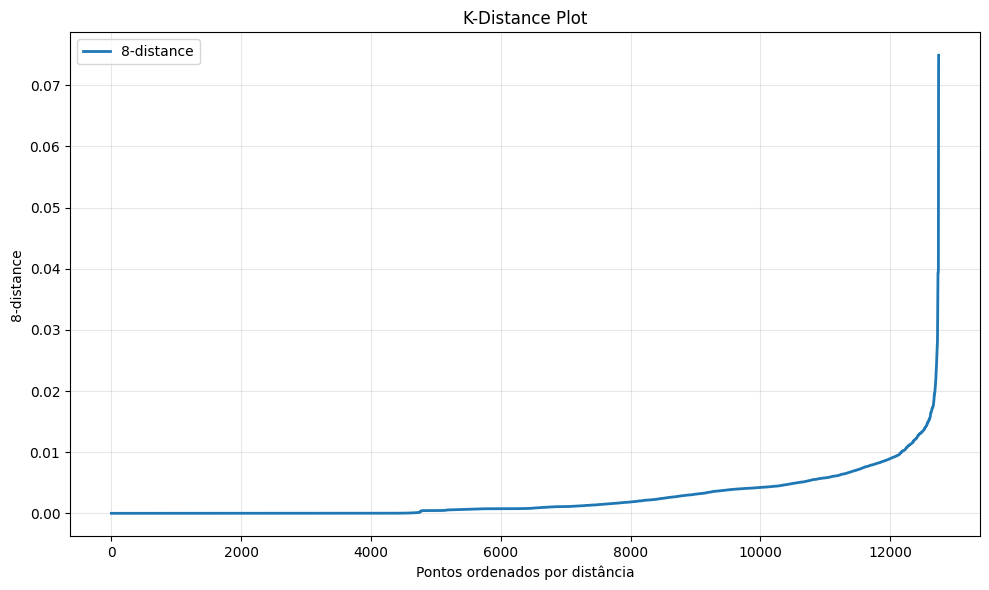

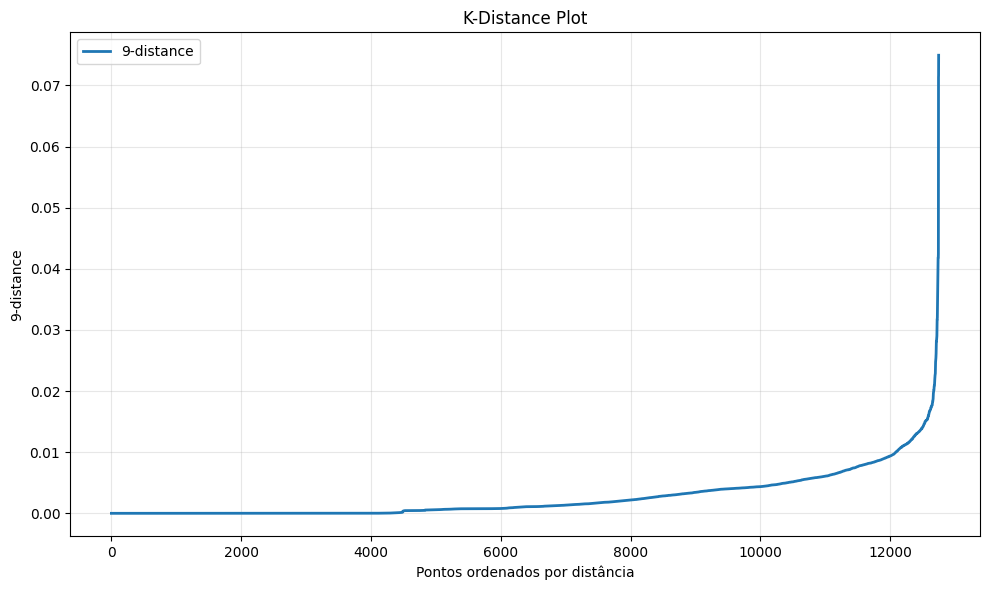

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def plot_k_distance(X, min_pts, title="K-Distance Plot"):
    """Plota o gráfico K-Distance usando sklearn.NearestNeighbors."""
    k = int(min_pts - 1)

    nn = NearestNeighbors(n_neighbors=k+1, metric="euclidean")
    nn.fit(X)
    distances, _ = nn.kneighbors(X)

    kth_distances = distances[:, k]
    k_distances_sorted = np.sort(kth_distances)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(k_distances_sorted)), k_distances_sorted, linewidth=2, label=f'{k}-distance')
    plt.xlabel("Pontos ordenados por distância")
    plt.ylabel(f"{k}-distance")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

for k in range(4,11):
  plot_k_distance(X_pca, min_pts=k)

In [ ]:
dbscan = DBSCAN(eps=0.009, min_samples=5)  # eps = raio do vizinho, min_samples = densidade mínima
labels = dbscan.fit_predict(X_pca)
df_plot['labels'] = labels

In [ ]:
df_sample = df_plot.sample(frac=0.1, random_state=42)

/tmp/ipython-input-427713396.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


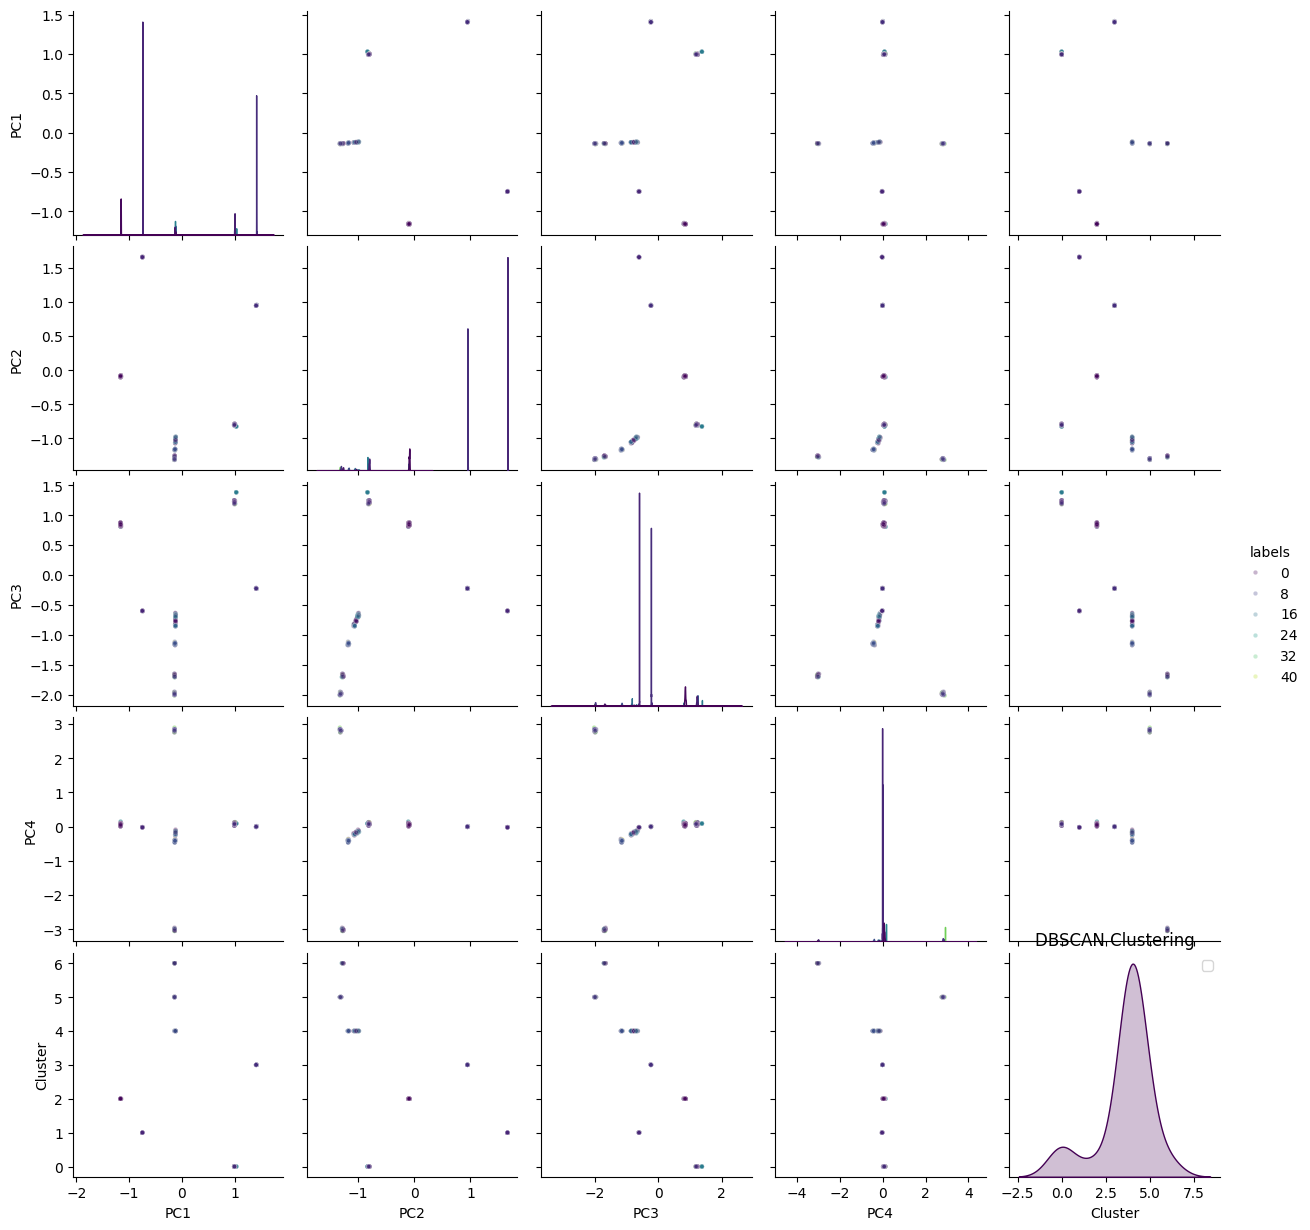

In [ ]:
sns.pairplot(df_sample,kind='scatter', hue='labels', palette='viridis',plot_kws={'s':10, 'alpha':0.3})
#sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title("DBSCAN Clustering")
plt.legend()
plt.grid(True)
plt.show()

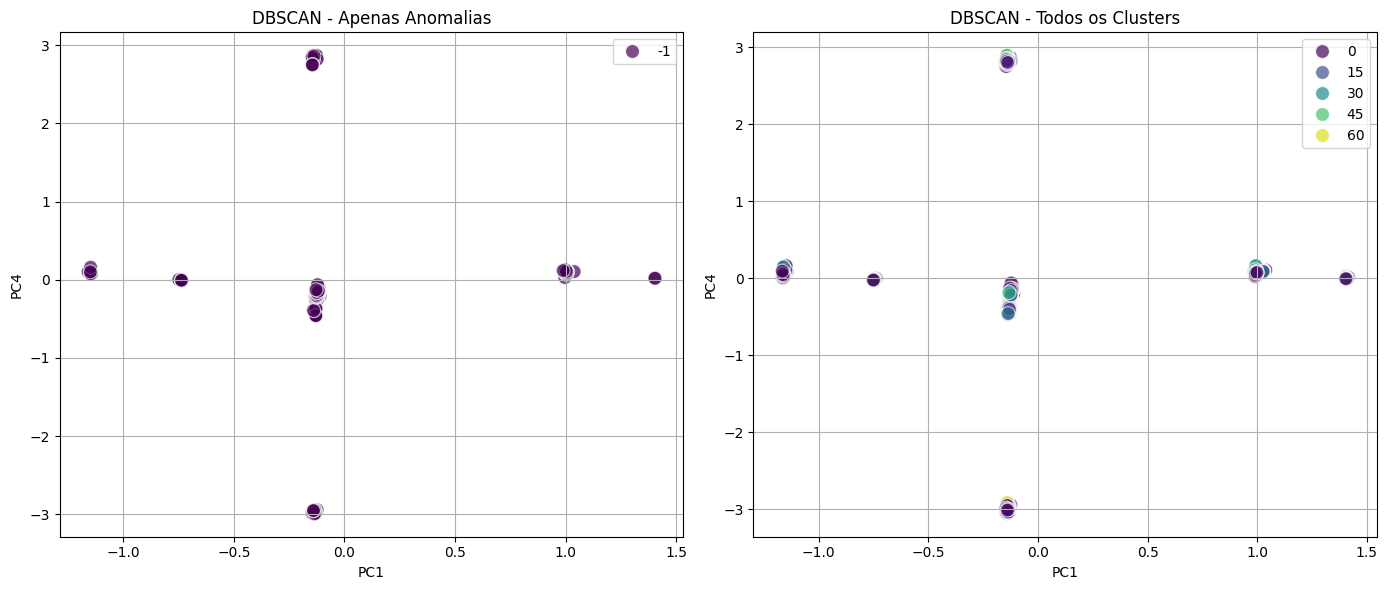

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

sns.scatterplot(
    data=df_plot[df_plot['labels'] == -1],
    x='PC1', y='PC4', hue='labels',
    palette='viridis', s=100, alpha=0.7,
    ax=axes[0]
)
axes[0].set_title("DBSCAN - Apenas Anomalias")
axes[0].grid(True)
axes[0].legend()

sns.scatterplot(
    data=df_plot,
    x='PC1', y='PC4', hue='labels',
    palette='viridis', s=100, alpha=0.7,
    ax=axes[1]
)
axes[1].set_title("DBSCAN - Todos os Clusters")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

# Métricas de avaliação de clusters

---

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist

def dunn_index(X, labels):
    clusters = np.unique(labels)
    # calcula dispersão máxima (diâmetro) de cada cluster
    intra_dists = []
    for c in clusters:
        pontos_cluster = X[labels == c]
        if len(pontos_cluster) > 1:
            distancias = cdist(pontos_cluster, pontos_cluster, metric='euclidean')
            intra_dists.append(distancias.max())
        else:
            intra_dists.append(0)  # cluster com 1 ponto
    max_intra = np.max(intra_dists)

    # calcula distância mínima entre clusters
    inter_dists = []
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            pontos_i = X[labels == clusters[i]]
            pontos_j = X[labels == clusters[j]]
            dist = cdist(pontos_i, pontos_j, metric='euclidean').min()
            inter_dists.append(dist)
    min_inter = np.min(inter_dists)

    return min_inter / max_intra if max_intra > 0 else 0

In [ ]:
silhouette = silhouette_score(X_pca, df_plot['Cluster'])
dbi = davies_bouldin_score(X_pca, df_plot['Cluster'])
dunn = dunn_index(X_pca, df_plot['Cluster'])

In [ ]:
silhouette

In [ ]:
dbi

In [ ]:
dunn